<class 'numpy.ndarray'>
uint8
0 255


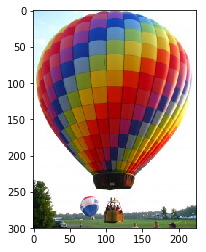

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from skimage import io

image = io.imread('/Users/amy/Desktop/skimage-tutorials/images/balloon.jpg')

print(type(image))
print(image.dtype)
print(image.min(), image.max())
plt.imshow(image);



In [2]:
#Displaying all images
ic = io.ImageCollection('/Users/amy/Desktop/skimage-tutorials/images/*.jpg')

print('Type:', type(ic))

ic.files

Type: <class 'skimage.io.collection.ImageCollection'>


['/Users/amy/Desktop/skimage-tutorials/images/Bells-Beach.jpg',
 '/Users/amy/Desktop/skimage-tutorials/images/balloon.jpg',
 '/Users/amy/Desktop/skimage-tutorials/images/bubbles.jpg',
 '/Users/amy/Desktop/skimage-tutorials/images/chromosomes.jpg',
 '/Users/amy/Desktop/skimage-tutorials/images/color-wheel.jpg',
 '/Users/amy/Desktop/skimage-tutorials/images/credit_card.jpg',
 '/Users/amy/Desktop/skimage-tutorials/images/forest.jpg',
 '/Users/amy/Desktop/skimage-tutorials/images/greenscreen.jpg',
 '/Users/amy/Desktop/skimage-tutorials/images/hand-coin.jpg',
 '/Users/amy/Desktop/skimage-tutorials/images/microarray.jpg',
 '/Users/amy/Desktop/skimage-tutorials/images/mona_lisa.jpg',
 '/Users/amy/Desktop/skimage-tutorials/images/round_pill.jpg',
 '/Users/amy/Desktop/skimage-tutorials/images/spice_1.jpg',
 '/Users/amy/Desktop/skimage-tutorials/images/spices.jpg',
 '/Users/amy/Desktop/skimage-tutorials/images/stefan.jpg',
 '/Users/amy/Desktop/skimage-tutorials/images/superprom_prev.jpg']

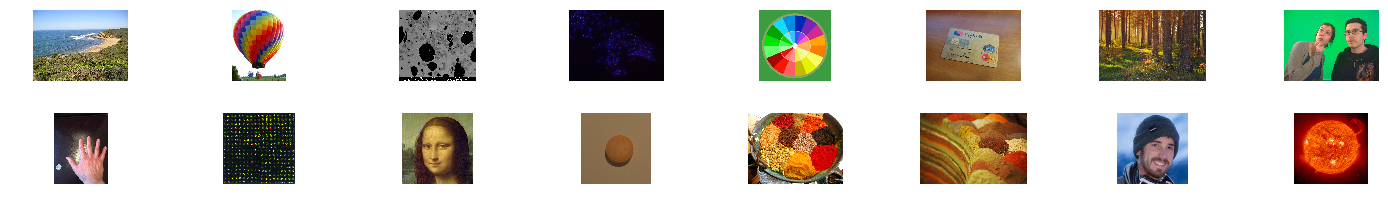

In [3]:
f, axes = plt.subplots(nrows=2, ncols=len(ic) // 2, figsize=(20, 3))

for i, image in enumerate(ic):
    axes.flat[i].imshow(image, cmap='gray')
    axes.flat[i].axis('off')
    
plt.tight_layout()

In [4]:
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt

In [5]:
digits = datasets.load_digits()
print(digits.target.shape)
print(digits.images.shape)

(1797,)
(1797, 8, 8)


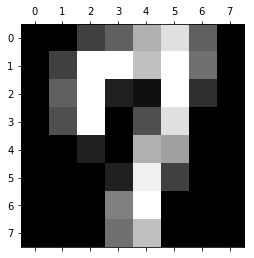

In [6]:
plt.gray() 
plt.matshow(digits.images[480]) 
plt.show() 

In [32]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1)) #1 dimensional vector 
train_data = data[:n_samples//2]  # take 50% of data for training, 898x64 matrix
test_data = data[n_samples//2:] # 898x64 matrix
y_train = digits.target[:n_samples//2]
y_test = digits.target[n_samples//2:] #vector containing labels characters
train_data.shape

(898, 64)

In [22]:
# let's train the model
classifier = svm.SVC(C = 1,gamma=0.001)
classifier.fit(train_data, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
# let's predict

predicted = classifier.predict(test_data)
print("Classification report for classifier %s:\n%s\n"% (classifier, metrics.classification_report(y_test, predicted)))


Classification report for classifier SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


